In [75]:
from random import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [44]:
graph1 = nx.fast_gnp_random_graph(50, 0.05)

/Users/yus/anaconda3/envs/cnet/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


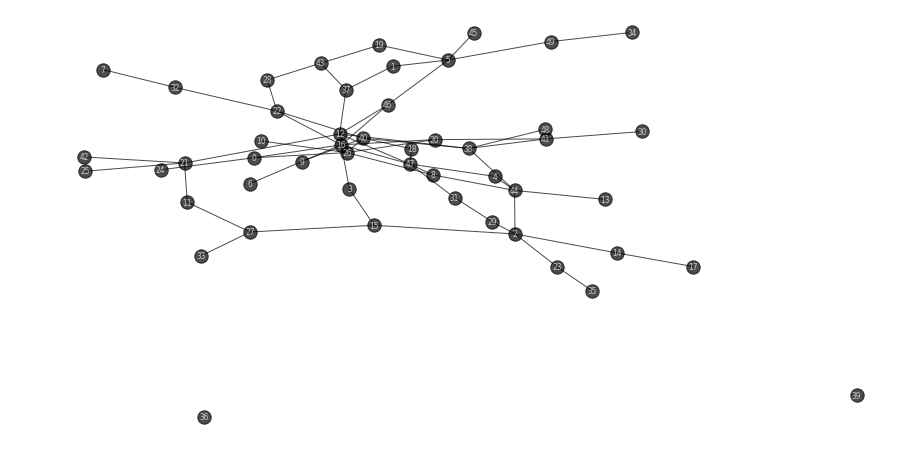

In [33]:
plt.figure(figsize=(12,6))
nx.draw_spring(
    graph,
    alpha=0.7,
    font_color='white',
    font_size=7.5,
    node_color='black',
    node_size=180,
    with_labels=True
)

In [34]:
graph = nx.Graph()

In [41]:
graph.add_node('s', core_score=0.3)

In [42]:
nx.get_node_attributes(graph, 'core_score')


{1: 0.5, 's': 0.3}

In [158]:
def set_random_core_values(graph):
    core_scores = {node: random() for node in graph.nodes()}
    core_confidences = {node: random() for node in graph.nodes()}
    nx.set_node_attributes(graph, core_scores, 'core_score')
    nx.set_node_attributes(graph, core_confidences, 'core_confidence')
    
def generate_random_graph(N=50, p=0.1):
    graph = nx.fast_gnp_random_graph(N, p)
    set_random_core_values(graph)
    
    return graph

In [136]:
set_random_core_values(graph1)

In [137]:
nx.get_node_attributes(graph1, 'core_confidence')

{0: 0.5426466580368088,
 1: 0.023599120354580783,
 2: 0.08717126605485903,
 3: 0.7090085161079336,
 4: 0.12989422346590118,
 5: 0.2554256993490974,
 6: 0.8074848215057558,
 7: 0.28093565635999485,
 8: 0.5615874930406975,
 9: 0.32247547026125833,
 10: 0.36932191604155085,
 11: 0.20464942286849674,
 12: 0.3211204650867656,
 13: 0.7489151938025617,
 14: 0.43466402140216087,
 15: 0.654207431540281,
 16: 0.4957662762456021,
 17: 0.0541517451573682,
 18: 0.3839649491657702,
 19: 0.13174333284430462,
 20: 0.5294095716963882,
 21: 0.36869292442381163,
 22: 0.8387955868591201,
 23: 0.5697991080454371,
 24: 0.31566616649873736,
 25: 0.355157649395366,
 26: 0.9312356205951915,
 27: 0.5071963142378489,
 28: 0.39312864252011204,
 29: 0.3747124017788156,
 30: 0.7483503653284498,
 31: 0.47800461983895326,
 32: 0.1982904911091683,
 33: 0.8854258997052235,
 34: 0.14372169529310275,
 35: 0.2623425329172602,
 36: 0.6608433443417034,
 37: 0.9045291285377216,
 38: 0.7087277897062498,
 39: 0.483961406359237

/Users/yus/anaconda3/envs/cnet/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


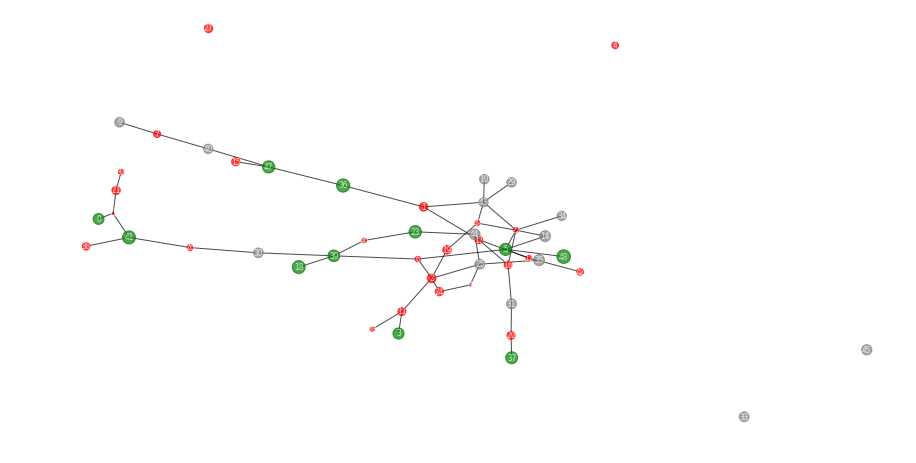

In [138]:
def core_score_to_color(core_score):
    if core_score < 0.4:
        return 'red'
    if core_score < 0.6:
        return 'gray'
    return 'green'


draw_graph(graph1)

/Users/yus/anaconda3/envs/cnet/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


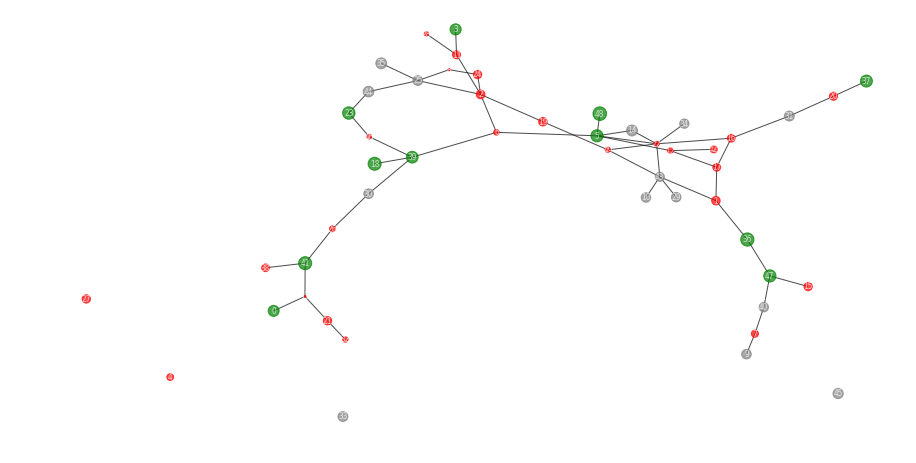

In [139]:
draw_graph(generate_random_graph())

In [140]:
graph = nx.Graph()

graph.add_node('oeuaoeo')
graph.add_nodes([1, 2, 3])

graph.add_edge(u, v)
graph.add_edges([(u1, v1), ])


nx.set_node_attributes(graph, values, 'core_score')

AttributeError: 'Graph' object has no attribute 'add_nodes'

In [187]:
MAX_DEPTH = 5

class Graph:
    def __init__(self, graph):
        self.graph = generate_random_graph()
        
        
    @staticmethod
    def random(N = 50, p = 0.1):
        def set_random_core_values(graph):
            core_scores = {node: random() for node in graph.nodes()}
            core_confidences = {node: random() for node in graph.nodes()}
            nx.set_node_attributes(graph, core_scores, 'core_score')
            nx.set_node_attributes(graph, core_confidences, 'core_confidence')
    
        graph = nx.fast_gnp_random_graph(N, p)
        set_random_core_values(graph)

        return Graph(graph)
    
    def draw_graph(graph):
        core_scores = nx.get_node_attributes(graph1, 'core_score')
        core_confidences = nx.get_node_attributes(graph1, 'core_confidence')
        nodes = graph1.nodes
        plt.figure(figsize=(12,6))
        nx.draw_spring(
            graph1,
            alpha=0.7,
            font_color='white',
            font_size=7.5,
            node_color=[core_score_to_color(core_score) for core_score in core_scores.values()],
            node_color=[core_score_to_color(core_score) for core_score in core_scores.values()],
            with_labels=True
        )

       
    def compute_scores(self, node):
        scores_tracker = []
        confidences_tracker = []
        
        core_scores = nx.get_node_attributes(self.graph, 'core_score')
        confidence_scores = nx.get_node_attributes(self.graph, 'core_confidence')
        
        def populate_trackers(node, degree=None):
            if degree:
                scores_tracker.append(core_scores[node]**degree)
                confidences_tracker.append(confidence_scores[node]**degree)
            
            if degree is not MAX_DEPTH: 
                for node in self.graph.neighbors(node):
                    populate_trackers(node, degree + 1 if degree else 1)
            
        populate_trackers(node)
        
        scores_from_neighbors = (np.mean(scores_tracker), np.mean(confidences_tracker))
        own_scores = (core_scores[node], confidence_scores[node])
        
        def aggregate(own_score, neighbor_score):
            return 0.5 * own_score + 0.5 * neighbor_score
        
        return tuple(aggregate(*components) for components in zip(scores_from_neighbors, own_scores))

In [194]:
g = Graph.random(N=500, p=0.5)
g.compute_scores(1)

(0.5866562161495754, 0.43125479086645835)

In [165]:
nx.get_node_attributes(g.graph, 'core_confidence')
set_random_core_scores


<function __main__.set_random_core_scores(graph)>